In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os
import sys

src_dir = './../../src/'
sys.path[0] = src_dir

import matplotlib.pyplot as plt

import glob

import numpy as np
import pandas as pd
import seaborn as sns

from collections import OrderedDict

from access_biology_data import meta, relations, properties
from access_literature_data import medline
from access_science_shared import standardizer 

In [4]:
sys.path.append('./../src/')
from aging_tools import inout, export
from access_aging_data import earlier_studies, chaperome, companions, sequencing

In [5]:
from narrative import nar181026_heat_confidence_genes
from narrative import nar181101_single_cell
from narrative import nar181205_networks

In [6]:
save_images = True

In [7]:
# p = inout.get_internal_path(
#     "datasets/other/direct_communication_from_rgrant/190424_gtex_sample_numbers_slack_to_tstoeger/190424_GTEx_sample_Ns.csv")

In [8]:
# df=pd.read_csv(p, usecols=[1, 2])

In [9]:
from access_science_shared import inout as rinout

In [10]:
# get information on donors
p = rinout.get_path(
    'gtex', 'GTEx_v7_Annotations_SubjectPhenotypesDS.txt')

df_sujects = pd.read_table(p)
df_sujects = df_sujects.rename(columns={' SUBJID': 'SUBJID'})   # typo

df_sujects['SEX'] = df_sujects['SEX'].replace({
    1: 'm',    # manually update according to accompanying GTEX excel file
    2: 'f'
}
)

# get information on specimen
p = rinout.get_path(
    'gtex', 'GTEx_v7_Annotations_SampleAttributes.txt')
df_sample_attributes = pd.read_table(p)

# Add donor information to specimen information
df_sample_attributes.loc[:, 'SUBJID'] = df_sample_attributes[
    'SAMPID'].str.extract(
    '^([^-]*-[^-]*).*',      # Donor appears encoded in part of sample name
        expand=False)

df_meta = pd.merge(df_sample_attributes, df_sujects,
                   how='left', left_on='SUBJID', right_on='SUBJID')
df_meta = df_meta.set_index('SAMPID', verify_integrity=True)

In [11]:
mini_meta = df_meta[['SMTSD', 'SEX', 'AGE']]

In [12]:
mini_meta['AGE'] = mini_meta['AGE'].apply(lambda x: int(x[0]))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
mini_meta = mini_meta.reset_index().groupby(['SMTSD', 'SEX', 'AGE']).size().reset_index()

In [14]:
mini_meta = mini_meta.rename(columns={0: 'samples'})

In [15]:
mini_meta = mini_meta[mini_meta['samples']>=2]

In [16]:
df = mini_meta[['SMTSD', 'AGE', 'samples']].groupby(['SMTSD', 'AGE']).agg(sum).reset_index().rename(
    columns={'SMTSD': 'subregion', 'samples': 'count'}
)

In [17]:
f = df['subregion'].str.startswith('Cells')
df = df[~f]

In [18]:
len(df['subregion'].value_counts())

51

In [19]:
# df['subregion'] = df['tissue'].apply(lambda x: x[2:-2])
# f = df['subregion'].str.startswith('Cells')
# df = df[~f]
# df['age'] = df['tissue'].apply(lambda x: x[-1])
# df['gender'] = df['tissue'].apply(lambda x: x[0])

In [20]:
# h = df[df['gender']=='M'].pivot(index='subregion', columns='age', values='count').fillna(0)

In [21]:
h = df.pivot(index='subregion', columns='AGE', values='count').fillna(0)

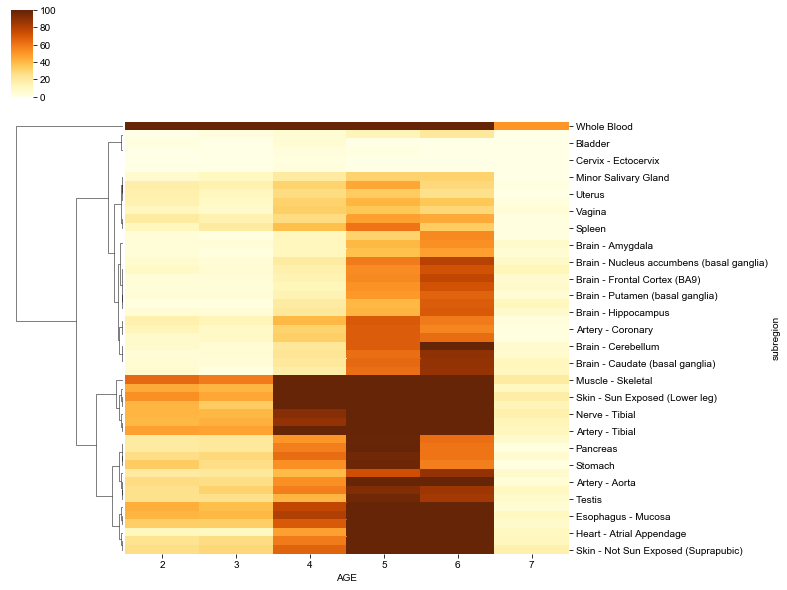

In [22]:
sns.clustermap(
    h, 
    cmap='YlOrBr',
    vmin=0,
    vmax=100,
    col_cluster=False,
    method='ward'
)

if save_images:
    export.export_image('190429_samples_per_gtex_age/clustered_tissues_100.pdf')

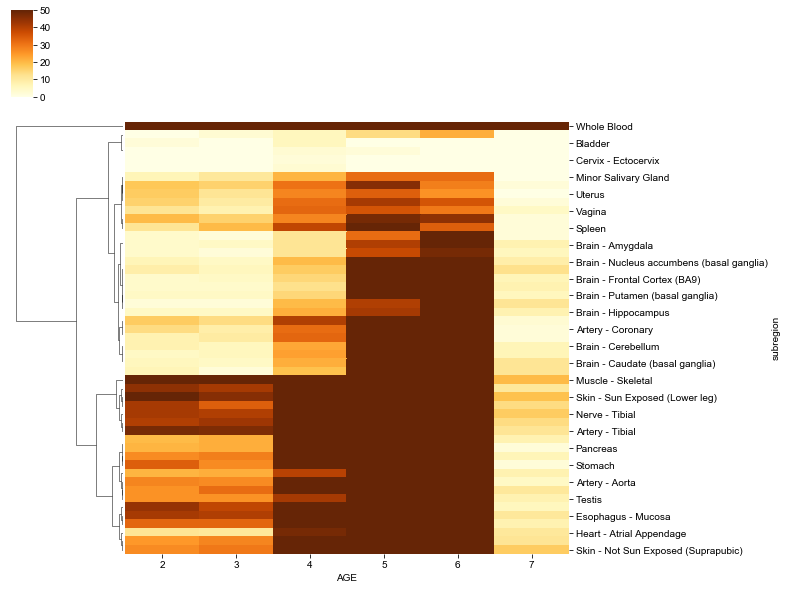

In [23]:
sns.clustermap(
    h, 
    cmap='YlOrBr',
    vmin=0,
    vmax=50,
    col_cluster=False,
    method='ward'
)

if save_images:
    export.export_image('190429_samples_per_gtex_age/clustered_tissues_50.pdf')